# Vishal Thummalapally - Final Project - Data Bootcamp

In this project, I'm going to look at TV ad data on the date of 1/31/16. Ads are tracked across a number of cities across the US. The idea is to examine WHEN different industries and brands advertise, and also how that might differ in various cities. 


I originally wanted to combine this with social engagement data, but I wasn't able to pull that data in time. 

In [4]:
#4/27/16

import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn as sns 
import random
import string

from python_vlookup import python_vlookup

# these lines make our graphics show up in the notebook
%matplotlib inline             

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)
print('Today: ', dt.date.today())
import datetime


Python version: 3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.17.1
Seaborn version:  0.7.0
Today:  2016-05-12


In [5]:
#Let's read in the data we'll be using

#This is proprietary TV ad data that has been tracked at the company i intern with  

df = pd.read_csv("DailyData_2016_01_31.csv")

In [6]:
#let's see what the data looks like.
df.dtypes

Channel: ResourceID         object
UTC detection start         object
Local detection start       object
EPG Program name            object
Asset: ResourceID           object
Brand                       object
Product                     object
Category                    object
Asset: Type                 object
Video                       object
Detection duration          object
Asset: Length               object
Actual detection length     object
Market: ResourceID          object
TMS ID                     float64
dtype: object

In [7]:
#let's see what the size is 
df.shape

(562765, 15)

In [8]:
#Holy cow that's a big dataset. Here's a preview of the first few rows 
df.head(10)

,Channel: ResourceID,UTC detection start,Local detection start,EPG Program name,Asset: ResourceID,Brand,Product,Category,Asset: Type,Video,Detection duration,Asset: Length,Actual detection length,Market: ResourceID,TMS ID
0,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-02-01493,Toyota,"Toyota - Corolla, Corolla LE",Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/14/06/5...,0:00:07,0:00:30,0:00:07,MK00003,20453
1,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2015-23-00711,Memorial Sloan-Kettering Cancer Center,Memorial Sloan-Kettering Cancer Center,Health,Health - Hospital,https://www.teletrax.com/video/2015/06/02/08/3...,0:00:10,0:00:15,0:00:10,MK00003,20453
2,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-01-00548,I LOVE NEW YORK,I LOVE NEW YORK,Travel,Travel - Destinations,https://www.teletrax.com/video/2016/01/05/05/0...,0:00:29,0:00:30,0:00:29,MK00003,20453
3,CH00041,1/30/2016 5:01,1/30/2016 0:01,Jimmy Kimmel Live,AE16546-2016-04-00653,Roundabout Theatre Company,Roundabout Theatre Company - Noises Off,Entertainment / Media / Leisure,Entertainment / Media / Leisure - Performing Arts,https://www.teletrax.com/video/2016/01/26/14/3...,0:00:15,0:00:15,0:00:15,MK00003,20453
4,CH00041,1/30/2016 5:06,1/30/2016 0:06,Jimmy Kimmel Live,AE16546-2015-51-00147,Nationwide,Nationwide,Legal / Financial,Legal / Financial - Banks,https://www.teletrax.com/video/2015/12/14/07/5...,0:00:29,0:00:30,0:00:29,MK00003,20453
5,CH00041,1/30/2016 5:07,1/30/2016 0:07,Jimmy Kimmel Live,AE16546-2016-04-01284,AT&T,AT&T,Telecommunications,Telecommunications - Mobile Phone Network Prov...,https://www.teletrax.com/video/2016/01/29/06/2...,0:00:23,0:00:30,0:00:23,MK00003,20453
6,CH00041,1/30/2016 5:08,1/30/2016 0:08,Jimmy Kimmel Live,AE16546-2014-53-00853,NicoDerm,NicoDerm - CQ,Health,Health - Addiction Support,https://www.teletrax.com/video/2014/12/30/14/5...,0:00:15,0:00:15,0:00:15,MK00003,20453
7,CH00041,1/30/2016 5:08,1/30/2016 0:08,Jimmy Kimmel Live,AE16546-2016-03-01287,Intel,Intel,Electronics / Technology,Electronics / Technology - Computer Parts / Ac...,https://www.teletrax.com/video/2016/01/21/05/1...,0:01:01,0:01:00,0:01:01,MK00003,20453
8,CH00041,1/30/2016 5:09,1/30/2016 0:09,Jimmy Kimmel Live,AE16546-2014-28-01270,Subaru,Subaru - Legacy,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2014/07/09/19/2...,0:00:23,0:00:30,0:00:23,MK00003,20453
9,CH00041,1/30/2016 5:09,1/30/2016 0:09,Jimmy Kimmel Live,AE16546-2016-04-00173,Subway,Subway - Roast Beef,Restaurants,Restaurants - Fast Food,https://www.teletrax.com/video/2016/01/25/09/3...,0:00:29,0:00:30,0:00:29,MK00003,20453


In [9]:
#Need to split some columsn into things we can use! 

df['Time_sec'] = df['Asset: Length'].str.split(':').apply(lambda x: int(x[1]) * 60 + int(x[2]))
df['Time_sec_detect'] = df['Actual detection length'].str.split(':').apply(lambda x: int(x[1]) * 60 + int(x[2]))
# This is how you split the time column = df['Asset: Length'].str.split(':')
#This is how you convert time col to seconds = df['Asset: Length'].str.split(':').apply(lambda x: int(x[1]) * 60 + int(x[2]))

df.head()

,Channel: ResourceID,UTC detection start,Local detection start,EPG Program name,Asset: ResourceID,Brand,Product,Category,Asset: Type,Video,Detection duration,Asset: Length,Actual detection length,Market: ResourceID,TMS ID,Time_sec,Time_sec_detect
0,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-02-01493,Toyota,"Toyota - Corolla, Corolla LE",Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/14/06/5...,0:00:07,0:00:30,0:00:07,MK00003,20453,30,7
1,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2015-23-00711,Memorial Sloan-Kettering Cancer Center,Memorial Sloan-Kettering Cancer Center,Health,Health - Hospital,https://www.teletrax.com/video/2015/06/02/08/3...,0:00:10,0:00:15,0:00:10,MK00003,20453,15,10
2,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-01-00548,I LOVE NEW YORK,I LOVE NEW YORK,Travel,Travel - Destinations,https://www.teletrax.com/video/2016/01/05/05/0...,0:00:29,0:00:30,0:00:29,MK00003,20453,30,29
3,CH00041,1/30/2016 5:01,1/30/2016 0:01,Jimmy Kimmel Live,AE16546-2016-04-00653,Roundabout Theatre Company,Roundabout Theatre Company - Noises Off,Entertainment / Media / Leisure,Entertainment / Media / Leisure - Performing Arts,https://www.teletrax.com/video/2016/01/26/14/3...,0:00:15,0:00:15,0:00:15,MK00003,20453,15,15
4,CH00041,1/30/2016 5:06,1/30/2016 0:06,Jimmy Kimmel Live,AE16546-2015-51-00147,Nationwide,Nationwide,Legal / Financial,Legal / Financial - Banks,https://www.teletrax.com/video/2015/12/14/07/5...,0:00:29,0:00:30,0:00:29,MK00003,20453,30,29


In [10]:
#Let's see if Pivot Tables help us at all 

#Below, we see total seconds of Ads per Brand per Program, and count of Ads


pd.pivot_table(df,index=['EPG Program name', 'Brand'], values = ['Asset: ResourceID', 'Time_sec'], aggfunc=[np.sum,len])


sum               len  \
                                                   Time_sec Asset: ResourceID   
EPG Program name        Brand                                                   
...At First Sight       Allegra                          10                 1   
                        CatGenie                         30                 1   
                        Chevrolet                        30                 1   
                        Dodge                            30                 1   
                        Health Hotline                  120                 2   
                        Jeep                             30                 1   
                        Life Alert                      121                 2   
                        Meaningful Beauty               240                 2   
                        Miracle Bamboo Pillow           120                 1   
                        Proactiv                        120                 2   
                        RAM                             150                 5   
                        Rolaids                          10                 1   
                        TV-PROMO                        129                 6   
                        Unisom                           10                 1   
1 Minute Miracle Makeup Perfect Fitness                  60                 1   
10 News                 Carl’s Jr.                       15                 1   
                        Honda                            30                 1   
                        Nissan                           60                 2   
                        SONIC                            60                 2   
                        TV-PROMO                         30                 2   
                        Volkswagen                       30                 1   
10 News Conference      Gerber Life                      59                 1   
                        Liberator Medical Supply        111                 2   
                        Quicken Loans                    60                 1   
                        The Olympic Games                15                 1   
10 News Nightbeat       Ad Council                       30                 1   
                        Delsym                           15                 1   
                        Fiber One                        30                 1   
                        Ford                             60                 2   
                        Lexus                            30                 1   
...                                                     ...               ...   
¡Qué noche!             Extra                           555                37   
                        Ford                             90                 3   
                        IHOP                             15                 1   
                        IKEA                             30                 1   
                        ITT Technical Institute          60                 1   
                        InStyler                        121                 1   
                        Jack In The Box                  30                 1   
                        Jeep                             60                 2   
                        Just For Men                    210                14   
                        KFC                             330                22   
                        KIA                             120                 4   
                        Knorr                           480                31   
                        L’Oréal Paris                   705                33   
                        Maybelline                     1365                63   
                        McCafé                           30                 2   
                        Nissan                          120                 4   
      

In [11]:
#Now let's add columns to get time in minutes 
df['Time_min'] = df['Time_sec']/60
df['Time_min_detect'] = df['Time_sec_detect']/60
df.head()

,Channel: ResourceID,UTC detection start,Local detection start,EPG Program name,Asset: ResourceID,Brand,Product,Category,Asset: Type,Video,Detection duration,Asset: Length,Actual detection length,Market: ResourceID,TMS ID,Time_sec,Time_sec_detect,Time_min,Time_min_detect
0,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-02-01493,Toyota,"Toyota - Corolla, Corolla LE",Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/14/06/5...,0:00:07,0:00:30,0:00:07,MK00003,20453,30,7,0.50,0.116667
1,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2015-23-00711,Memorial Sloan-Kettering Cancer Center,Memorial Sloan-Kettering Cancer Center,Health,Health - Hospital,https://www.teletrax.com/video/2015/06/02/08/3...,0:00:10,0:00:15,0:00:10,MK00003,20453,15,10,0.25,0.166667
2,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-01-00548,I LOVE NEW YORK,I LOVE NEW YORK,Travel,Travel - Destinations,https://www.teletrax.com/video/2016/01/05/05/0...,0:00:29,0:00:30,0:00:29,MK00003,20453,30,29,0.50,0.483333
3,CH00041,1/30/2016 5:01,1/30/2016 0:01,Jimmy Kimmel Live,AE16546-2016-04-00653,Roundabout Theatre Company,Roundabout Theatre Company - Noises Off,Entertainment / Media / Leisure,Entertainment / Media / Leisure - Performing Arts,https://www.teletrax.com/video/2016/01/26/14/3...,0:00:15,0:00:15,0:00:15,MK00003,20453,15,15,0.25,0.250000
4,CH00041,1/30/2016 5:06,1/30/2016 0:06,Jimmy Kimmel Live,AE16546-2015-51-00147,Nationwide,Nationwide,Legal / Financial,Legal / Financial - Banks,https://www.teletrax.com/video/2015/12/14/07/5...,0:00:29,0:00:30,0:00:29,MK00003,20453,30,29,0.50,0.483333


In [12]:
cat_totals = df[["Category","Time_min_detect"]].groupby('Category').sum().sort_values('Time_min_detect')
cat_totals

# This is all categories advertised on this day, sorted by minutes detected

,Time_min_detect
Category,
Apparel / Footwear / Accessories,1655.866667
Education,1930.850000
Electronics / Technology,2182.100000
Home and Garden,3139.033333
Travel,3332.916667
Services,5514.750000
Restaurants,8827.000000
Consumer Products,9256.583333
Retail,9278.016667


In [13]:
#How many channels to we track? 
df[['Channel: ResourceID']].groupby('Channel: ResourceID').count()

""
Channel: ResourceID
CH00041
CH00042
CH00099
CH00101
CH00102
CH00103
CH00104
CH00105
CH00106


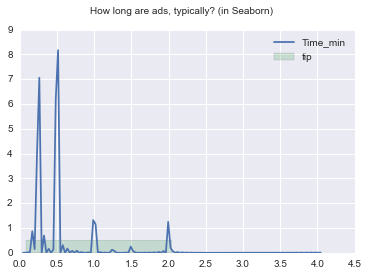

In [14]:
#Let's get a visual idea of what the popular ad lengths are using KDE plot

fig, ax = plt.subplots()

sns.kdeplot(df["Time_min"], ax=ax)
ax.hist(df["Time_min"], bins = 2, alpha=0.25, normed=True, label="tip")
ax.legend()

fig.suptitle("How long are ads, typically? (in Seaborn)")

plt.show()


In [15]:
#Let's experiment by grouping by Category, Brand, and Product. Maybe it'll be useful later.

df[['Brand','Product','Category','Time_min_detect']].groupby(['Category','Brand','Product']).sum()

Time_min_detect
Category                         Brand                           Product                                                            
Apparel / Footwear / Accessories Altra                           Altra                                                      0.950000
                                 American Aviator                American Aviator                                          20.416667
                                 Cami Shaper                     Cami Shaper                                                1.283333
                                 Card Lock                       Card Lock                                                 64.066667
                                 Diamond-z4                      Diamond-z4                                                25.350000
                                 Ever Us                         Ever Us                                                  573.700000
                                 Genie                           Genie - Hourglass                                         29.583333
                                 Genie Bra                       Genie Bra                                                  0.300000
                                 HD Vision                       HD Vision - HD Night Vision Wraparounds                   15.666667
                                 Hothands                        Hothands - Hand Warmers                                    5.233333
                                 Jeaneez                         Jeaneez                                                    4.550000
                                 Levi’s                          Levi’s                                                     0.966667
                                 Lock Wallet                     Lock Wallet                                              192.033333
                                 Mechanix Wear                   Mechanix Wear                                             11.033333
                                 Miss Belt                       Miss Belt                                                 70.150000
                                 Reebok                          Reebok                                                     1.333333
                                                                 Reebok - UFC Fight Kit                                   241.616667
                                 Rolex                           Rolex                                                      1.933333
                                 Secret Extensions               Secret Extensions                                          7.900000
                                 Slim Jeggings                   Slim Jeggings                                             10.583333
                                 The North Face                  The North Face                                           252.766667
                                 Timberland                      Timberland - PRO Boondock Work Boots                       0.333333
                                 Tommie Copper                   Tommie Copper                                             12.600000
                                 Tommy John                      Tommy John                                                 3.050000
                                 Under Armour                    Under Armour                                               0.250000
                                 Wonder Wallet                   Wonder Wallet                                            107.066667
                                 Wrangler                        Wrangler                                                   0.633333
                                                                 Wrangler - Premium Performance Cool Vantage Jeans          0.516667
Automotive / Vehicles            AAMCO                           AAMCO                                                     21.6

In [16]:
#Let's see which Auto brands advertise the most - at least for this day 

autos1 = df[df['Category'] == 'Automotive / Vehicles'].groupby(['Brand']).sum()
autos1.sort_values(['Time_min_detect'],ascending=False)

,TMS ID,Time_sec,Time_sec_detect,Time_min,Time_min_detect
Brand,,,,,
Chevrolet,119041402,129420,93256,2157.000000,1554.266667
Toyota,90951720,79707,66990,1328.450000,1116.500000
Ford,114020024,105331,59747,1755.516667,995.783333
Lexus,65714522,67533,56950,1125.550000,949.166667
Honda,73528340,72600,56282,1210.000000,938.033333
Hyundai,61087449,61684,51544,1028.066667,859.066667
Nissan,57242328,60000,49156,1000.000000,819.266667
Jeep,71499965,70320,48183,1172.000000,803.050000
Mercedes-Benz,63449696,62149,45015,1035.816667,750.250000


In [17]:
#Who are the top auto brands? 
TopAutoBrands = autos1.sort_values(['Time_min'],ascending=False).head(20)
TopAutoBrands


,TMS ID,Time_sec,Time_sec_detect,Time_min,Time_min_detect
Brand,,,,,
Chevrolet,119041402,129420,93256,2157.000000,1554.266667
Ford,114020024,105331,59747,1755.516667,995.783333
Toyota,90951720,79707,66990,1328.450000,1116.500000
Honda,73528340,72600,56282,1210.000000,938.033333
Jeep,71499965,70320,48183,1172.000000,803.050000
Lexus,65714522,67533,56950,1125.550000,949.166667
Mercedes-Benz,63449696,62149,45015,1035.816667,750.250000
Hyundai,61087449,61684,51544,1028.066667,859.066667
Nissan,57242328,60000,49156,1000.000000,819.266667


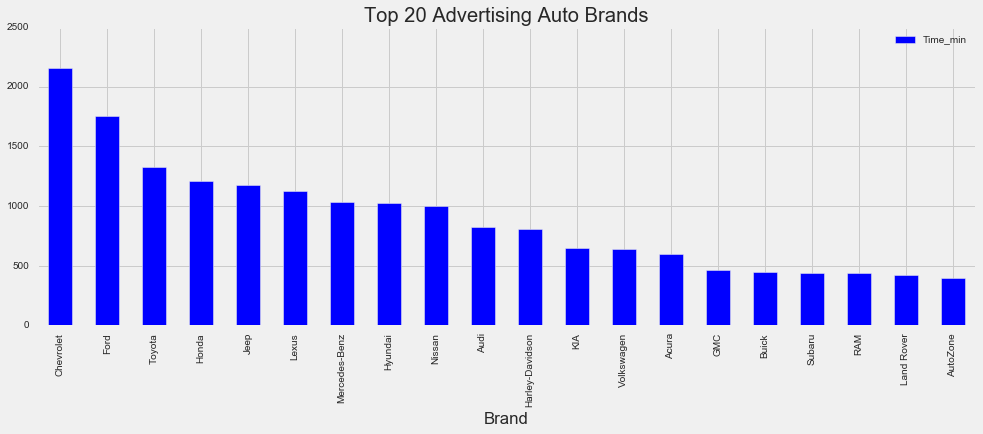

In [18]:
#Let's see how the top auto brands look in a chart! 

plt.style.use("fivethirtyeight")

TopAutoBrands.plot(y='Time_min',kind='bar',stacked=True,title="Top 20 Advertising Auto Brands", figsize=(15,5) )

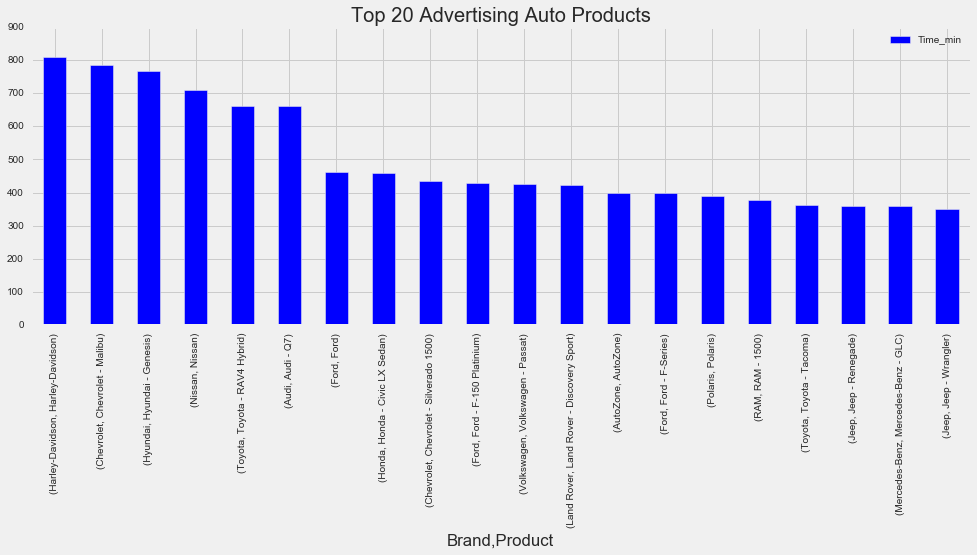

In [19]:
#Now let's see which auto PRODUCTS  advertise the most 

autos2 = df[df['Category'] == 'Automotive / Vehicles'].groupby(['Brand','Product']).sum()
TopAutoProducts = autos2.sort_values(['Time_min'],ascending=False).head(20)
plt.style.use("fivethirtyeight")
TopAutoProducts.plot(y='Time_min',kind='bar',stacked=True,title="Top 20 Advertising Auto Products", figsize=(15,5) )

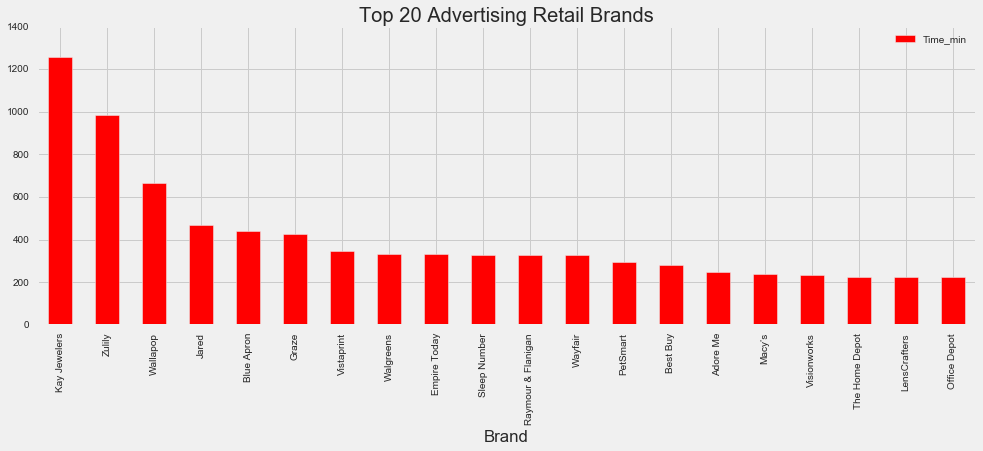

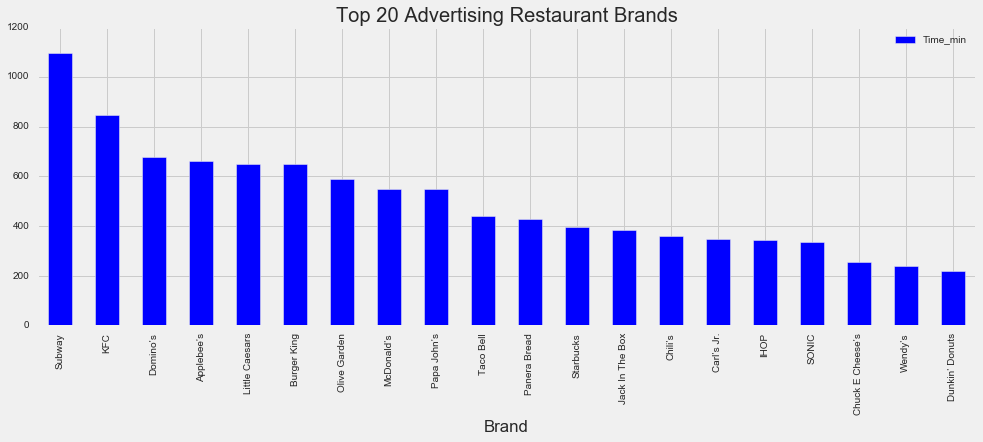

In [20]:
#Let's figure out top Retail and Restaurant Brands and compare to Auto

Ret1 = df[df['Category'] == 'Retail'].groupby(['Brand']).sum()
Ret1.sort_values(['Time_min'],ascending=False)
TopRetBrands = Ret1.sort_values(['Time_min'],ascending=False).head(20)

Resto1 = df[df['Category'] == 'Restaurants'].groupby(['Brand']).sum()
Resto1.sort_values(['Time_min'],ascending=False)
TopRestoBrands = Resto1.sort_values(['Time_min'],ascending=False).head(20)


plt.style.use("fivethirtyeight")


TopRetBrands.plot.bar(y='Time_min', color = "Red", stacked=True,title="Top 20 Advertising Retail Brands", figsize=(15,5) )
TopRestoBrands.plot.bar(y='Time_min', color = "Blue", stacked=True,title="Top 20 Advertising Restaurant Brands", figsize=(15,5) )

In [21]:
#Let's split out the Local Detection Start column to compare brands/products at what TIME OF DAY they start 

df['Date'] = df['Local detection start'].apply(lambda x: x.split(' ')[0])
df['TimeOfDay'] = df['Local detection start'].apply(lambda x: x.split(' ')[1])
df['Hour'] = df['TimeOfDay'].apply(lambda x: x.split(':')[0])

df.head()

,Channel: ResourceID,UTC detection start,Local detection start,EPG Program name,Asset: ResourceID,Brand,Product,Category,Asset: Type,Video,...,Actual detection length,Market: ResourceID,TMS ID,Time_sec,Time_sec_detect,Time_min,Time_min_detect,Date,TimeOfDay,Hour
0,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-02-01493,Toyota,"Toyota - Corolla, Corolla LE",Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/14/06/5...,...,0:00:07,MK00003,20453,30,7,0.50,0.116667,1/30/2016,0:00,0
1,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2015-23-00711,Memorial Sloan-Kettering Cancer Center,Memorial Sloan-Kettering Cancer Center,Health,Health - Hospital,https://www.teletrax.com/video/2015/06/02/08/3...,...,0:00:10,MK00003,20453,15,10,0.25,0.166667,1/30/2016,0:00,0
2,CH00041,1/30/2016 5:00,1/30/2016 0:00,Jimmy Kimmel Live,AE16546-2016-01-00548,I LOVE NEW YORK,I LOVE NEW YORK,Travel,Travel - Destinations,https://www.teletrax.com/video/2016/01/05/05/0...,...,0:00:29,MK00003,20453,30,29,0.50,0.483333,1/30/2016,0:00,0
3,CH00041,1/30/2016 5:01,1/30/2016 0:01,Jimmy Kimmel Live,AE16546-2016-04-00653,Roundabout Theatre Company,Roundabout Theatre Company - Noises Off,Entertainment / Media / Leisure,Entertainment / Media / Leisure - Performing Arts,https://www.teletrax.com/video/2016/01/26/14/3...,...,0:00:15,MK00003,20453,15,15,0.25,0.250000,1/30/2016,0:01,0
4,CH00041,1/30/2016 5:06,1/30/2016 0:06,Jimmy Kimmel Live,AE16546-2015-51-00147,Nationwide,Nationwide,Legal / Financial,Legal / Financial - Banks,https://www.teletrax.com/video/2015/12/14/07/5...,...,0:00:29,MK00003,20453,30,29,0.50,0.483333,1/30/2016,0:06,0


In [22]:
# Let's focus in on one product,  JUST the Hyundai Genesis 

HyundaiGen = df[df['Product'] == 'Hyundai - Genesis'].sort_values(['TimeOfDay'],ascending=True)
HyundaiGen.head()

,Channel: ResourceID,UTC detection start,Local detection start,EPG Program name,Asset: ResourceID,Brand,Product,Category,Asset: Type,Video,...,Actual detection length,Market: ResourceID,TMS ID,Time_sec,Time_sec_detect,Time_min,Time_min_detect,Date,TimeOfDay,Hour
371964,CH01317,1/30/2016 5:27,1/30/2016 0:27,Golf,AE16546-2016-02-01010,Hyundai,Hyundai - Genesis,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/12/14/0...,...,0:00:29,MK00001,14899,31,29,0.516667,0.483333,1/30/2016,0:27,0
372320,CH01318,1/30/2016 5:40,1/30/2016 0:40,Curling,AE16546-2016-02-01010,Hyundai,Hyundai - Genesis,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/12/14/0...,...,0:00:29,MK00001,15952,31,29,0.516667,0.483333,1/30/2016,0:40,0
372505,CH01318,1/30/2016 15:01,1/30/2016 10:01,Barclays Premier League Match of the Week,AE16546-2016-02-01010,Hyundai,Hyundai - Genesis,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/12/14/0...,...,0:00:29,MK00001,15952,31,29,0.516667,0.483333,1/30/2016,10:01,10
210962,CH00711,1/30/2016 20:18,1/30/2016 10:18,PGA Tour Golf,AE16546-2016-02-01010,Hyundai,Hyundai - Genesis,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2016/01/12/14/0...,...,0:00:29,MK00091,34331,31,29,0.516667,0.483333,1/30/2016,10:18,10
211095,CH00711,1/30/2016 20:18,1/30/2016 10:18,PGA Tour Golf,AE16546-2015-49-00471,Hyundai,Hyundai - Genesis,Automotive / Vehicles,Automotive / Vehicles - Car Manufacturers,https://www.teletrax.com/video/2015/12/01/04/3...,...,0:00:03,MK00091,34331,30,3,0.500000,0.050000,1/30/2016,10:18,10


In [23]:
#drop what you don't need
HyundaiGen.drop('Asset: ResourceID', axis=1, inplace=True)
HyundaiGen.drop('Category', axis=1, inplace=True)
HyundaiGen.drop('Asset: Type', axis=1, inplace=True)
HyundaiGen.drop('Video', axis=1, inplace=True)
HyundaiGen.drop('Market: ResourceID', axis=1, inplace=True)
HyundaiGen.drop('TMS ID', axis=1, inplace=True)



In [24]:
#Always make sure you've got the right format... 
HyundaiGen['Hour'] = HyundaiGen['Hour'].apply(lambda x: int(x))

In [25]:
HyundaiGen.dtypes

Channel: ResourceID         object
UTC detection start         object
Local detection start       object
EPG Program name            object
Brand                       object
Product                     object
Detection duration          object
Asset: Length               object
Actual detection length     object
Time_sec                     int64
Time_sec_detect              int64
Time_min                   float64
Time_min_detect            float64
Date                        object
TimeOfDay                   object
Hour                         int64
dtype: object

In [36]:
#Here we see the # Hyundai commercials in each hour timeslot 
HyundaiGenByHr = HyundaiGen[["Hour","Time_min"]].sort_values(by="Hour").groupby('Hour',as_index=False).count()

In [37]:
HyundaiGenByHr


,Hour,Time_min
0,0,2
1,6,1
2,8,2
3,9,1
4,10,22
5,11,23
6,12,91
7,13,109
8,14,106
9,15,160


In [28]:
HyundaiGenByHr.dtypes

Hour        int64
Time_min    int64
dtype: object

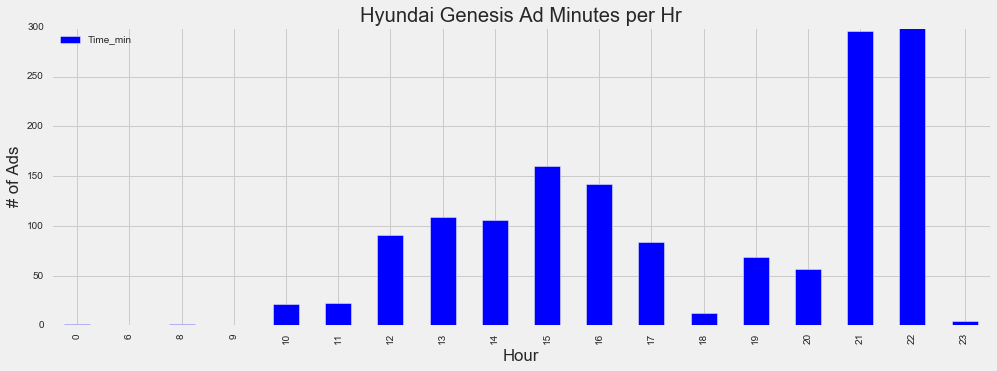

In [29]:
#Finally! Now we can look at how this product's ads are spread across the daytime. 
#Keep in mind i've used local detection time. That means, 5pm in NYC and 5PM in Chicago would show up as the same. 

plt.style.use("fivethirtyeight")

Plot1 = HyundaiGenByHr.plot(x='Hour',y='Time_min',kind='bar',stacked=True,title="Hyundai Genesis Ad Minutes per Hr",figsize=(15,5))
Plot1.set_xlabel("Hour")
Plot1.set_ylabel("# of Ads")

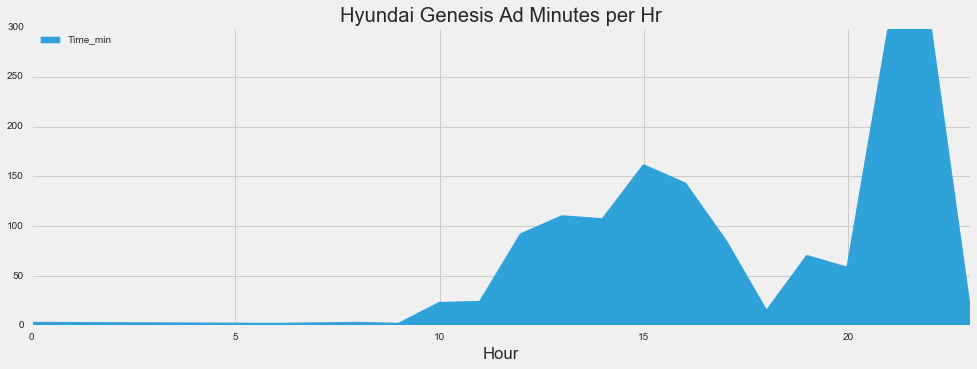

In [30]:
#Very interesting, lots of late-night ads and not so much in prime time. 
#Let's look at that with another view to see how ads are dispersed across the day time

HyundaiGenByHr.plot.area(x='Hour',y='Time_min',stacked=True,title="Hyundai Genesis Ad Minutes per Hr",figsize=(15,5))


In [31]:
#Now let's bring in another data set - mapping to GEOGRAPHY! 

BroadcastId = pd.read_csv("4CBroadcastID.csv")

#Merging is useful! 
df3 = pd.merge(df,BroadcastId,left_on='Channel: ResourceID', right_on='Resource.ID', how = 'left')

In [32]:
#Remove unnecessary columns 
df3.drop('Channel.Name', axis=1, inplace=True)
df3.drop('Affiliation', axis=1, inplace=True)
df3.drop('mkt_id', axis=1, inplace=True)
df3.drop('DMA.Rank', axis=1, inplace=True)

In [33]:
#Let's quickly see how many Markets we're tracking
df3[['Market.Name']].groupby('Market.Name').count()

""
Market.Name
Abilene-Sweetwater
Albany
Albany GA
Albuquerque
Alexandria
Alpena
Amarillo
Anchorage
Atlanta


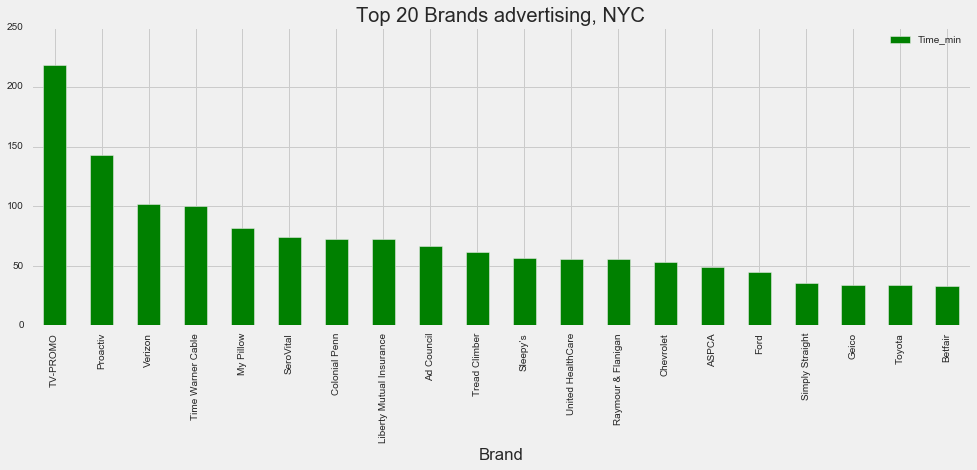

In [34]:
#Now, let's see who's advertising in NYC

NYCcat = df3[(df3['Market.Name'] == 'New York')].groupby(['Brand']).sum()
NYCcat.sort_values(['Time_min'],ascending=False)
NYCtopcat = NYCcat.sort_values(['Time_min'],ascending=False).head(20)
NYCtopcat.plot.bar(y='Time_min', color ="g", stacked=True,title="Top 20 Brands advertising, NYC", figsize=(15,5) )


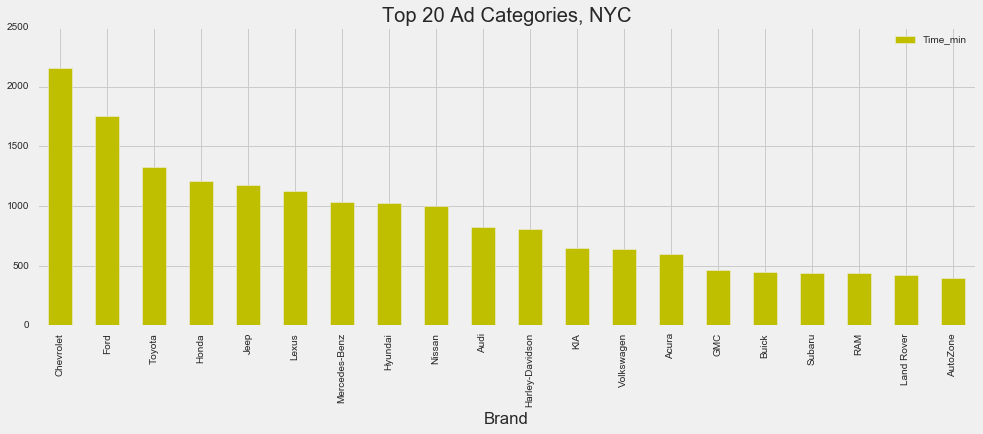

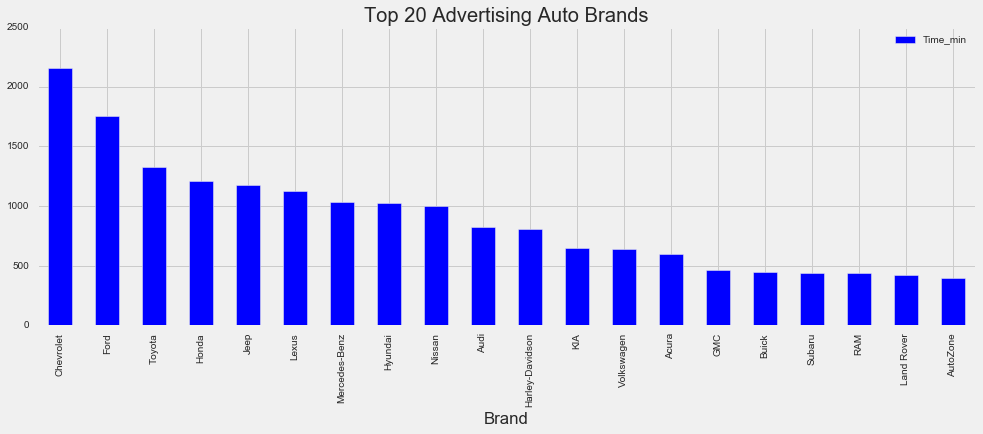

In [35]:
#Now let's see look at Cars again - and compare NYC to the rest of the US

NYCcat = df3[(df3['Category'] == 'Automotive / Vehicles')].groupby(['Brand']).sum()
NYCcat.sort_values(['Time_min'],ascending=False)
NYCtopcat = NYCcat.sort_values(['Time_min'],ascending=False).head(20)
NYCtopcat.plot.bar(y='Time_min', color ="y", stacked=True,title="Top 20 Ad Categories, NYC", figsize=(15,5) )
TopAutoBrands.plot(y='Time_min',kind='bar',stacked=True,title="Top 20 Advertising Auto Brands", figsize=(15,5) )


So we got to see how various categories, brands, and products are advertising across a span of a day. It's really quite interesting, but i lacked time to go deeper. 

All in all, learned a ton in this project. Merging was especially tricky, mainly due to data format problems. I thoroughly enjoyed this project and it forced me to learn so much. 

Thank you!